In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy
import matplotlib.pyplot as plt
from scipy.stats import mannwhitneyu
from scipy.stats import ttest_ind
from scipy.stats import f_oneway
%matplotlib inline

https://www.medcalc.org/manual/t-distribution-table.php

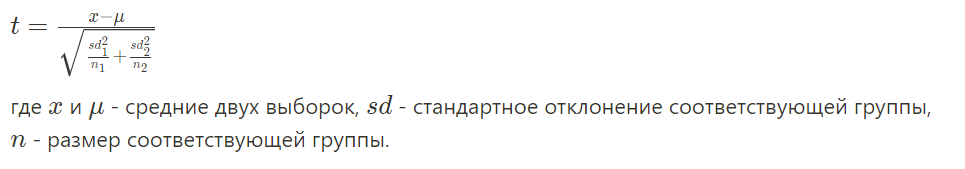

In [31]:
ads_data = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-v-novohatnij-29/shared/ads_data.csv.zip')

In [32]:
ads_data

,ad_id,time,event,date,ad_cost_type,has_video,client_union_id,campaign_union_id,platform,ad_cost,target_audience_count,user_id
0,23456,1554076848,view,2019-04-01,CPM,0,5681,23456,android,190.0,125560,793
1,111941,1554135866,view,2019-04-01,CPM,0,111793,111941,ios,215.2,32277,1041
2,111941,1554135866,view,2019-04-01,CPM,0,111793,111941,ios,215.2,32277,41
3,42987,1554135866,view,2019-04-01,CPM,0,28541,42985,ios,199.1,80160,898
4,23456,1554135866,view,2019-04-01,CPM,0,5681,23456,web,190.0,125560,29
...,...,...,...,...,...,...,...,...,...,...,...,...
3176709,112583,1554501092,view,2019-04-06,CPM,0,111818,112260,android,199.4,239408,5467
3176710,112583,1554501092,view,2019-04-06,CPM,0,111818,112260,android,199.4,239408,2508
3176711,112583,1554501092,click,2019-04-06,CPM,0,111818,112260,web,199.4,239408,7896
3176712,112583,1554501092,view,2019-04-06,CPM,0,111818,112260,ios,199.4,239408,4319


In [33]:
df = ads_data.groupby(['ad_id','ad_cost_type','platform','event'],as_index=False).agg({'user_id':'count'})

In [34]:
df

,ad_id,ad_cost_type,platform,event,user_id
0,3,CPC,android,click,5
1,3,CPC,android,view,244
2,3,CPC,ios,click,3
3,3,CPC,ios,view,147
4,3,CPC,web,click,1
...,...,...,...,...,...
1798,122086,CPC,android,view,1019
1799,122086,CPC,ios,click,16
1800,122086,CPC,ios,view,599
1801,122086,CPC,web,click,8


In [35]:
df = df.pivot(index=['ad_id','ad_cost_type','platform'],columns='event',values='user_id').reset_index()
df

event,ad_id,ad_cost_type,platform,click,view
0,3,CPC,android,5.0,244.0
1,3,CPC,ios,3.0,147.0
2,3,CPC,web,1.0,99.0
3,2132,CPC,android,1.0,55.0
4,2132,CPC,ios,NaN,26.0
...,...,...,...,...,...
1059,122063,CPM,ios,NaN,73.0
1060,122063,CPM,web,NaN,61.0
1061,122086,CPC,android,26.0,1019.0
1062,122086,CPC,ios,16.0,599.0


In [36]:
cost_type_df = df.groupby(['ad_id','ad_cost_type'],as_index=False).agg({'click':'sum','view':'sum'})

In [37]:
cost_type_df = cost_type_df.query('view > 100 & click > 0')

In [38]:
cost_type_df = cost_type_df.assign(ctr = cost_type_df.click / cost_type_df.view)

In [39]:
cost_type_df

,ad_id,ad_cost_type,click,view,ctr
0,3,CPC,9.0,490.0,0.018367
2,2276,CPC,2.0,1454.0,0.001376
4,2643,CPM,3.0,286.0,0.010490
5,4585,CPC,53.0,476.0,0.111345
6,4877,CPC,5.0,2160.0,0.002315
...,...,...,...,...,...
350,121941,CPM,1.0,640.0,0.001563
351,121943,CPC,15.0,1722.0,0.008711
352,122042,CPM,1.0,155.0,0.006452
353,122063,CPM,1.0,260.0,0.003846


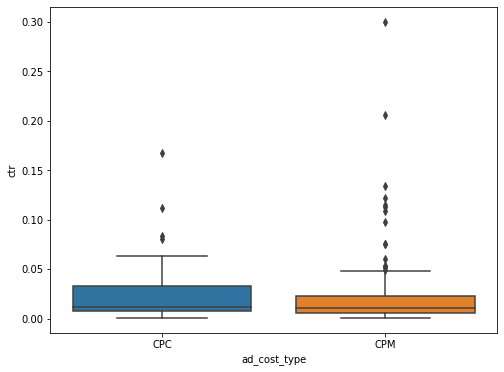

In [47]:
plt.figure(figsize=(8,6))
sns.boxplot(x='ad_cost_type',y='ctr',data=cost_type_df)

/opt/tljh/user/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


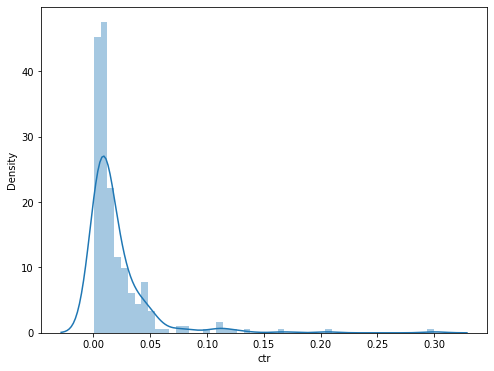

In [46]:
plt.figure(figsize=(8,6))
sns.distplot(cost_type_df.ctr)

In [42]:
cost_type_df.groupby('ad_cost_type').agg({'ctr':'median'})

,ctr
ad_cost_type,
CPC,0.012019
CPM,0.010490


In [43]:
cost_type_df.groupby('ad_cost_type').agg({'ctr':'mean'})

,ctr
ad_cost_type,
CPC,0.024107
CPM,0.019467


In [44]:
# Логарифм штрафует большие значения сильнее, чем маленькие

/opt/tljh/user/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


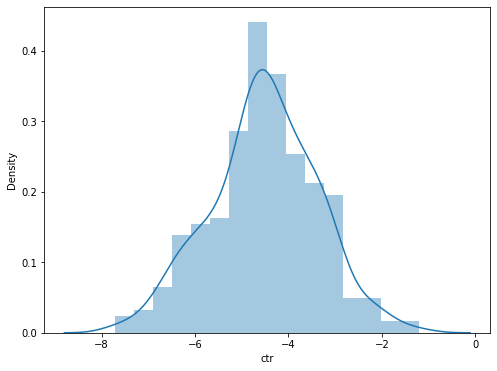

In [45]:
plt.figure(figsize=(8,6))
sns.distplot(np.log(cost_type_df.ctr))

In [48]:
cost_type_df['ctr_log'] = np.log(cost_type_df.ctr)

In [49]:
ttest_ind(cost_type_df[cost_type_df.ad_cost_type == 'CPM'].ctr_log,
         cost_type_df[cost_type_df.ad_cost_type == 'CPC'].ctr_log)

Ttest_indResult(statistic=-1.1407296867039143, pvalue=0.25489224816951805)

In [54]:
89.9 + 2.093 *(11.3/20**0.5)

95.18850201290499